In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings as wr
wr.filterwarnings('ignore')

In [27]:
# data is collected from kaggle
df = pd.read_csv('Sales data.csv')

In [28]:
df.head()

,Unnamed: 0,Date,Sales
0,0,2015-01-04,14.934283
1,1,2015-01-11,7.234714
2,2,2015-01-18,27.953771
3,3,2015-01-25,50.460597
4,4,2015-02-01,20.316933


In [29]:
df.drop('Unnamed: 0', axis=1, inplace=True)

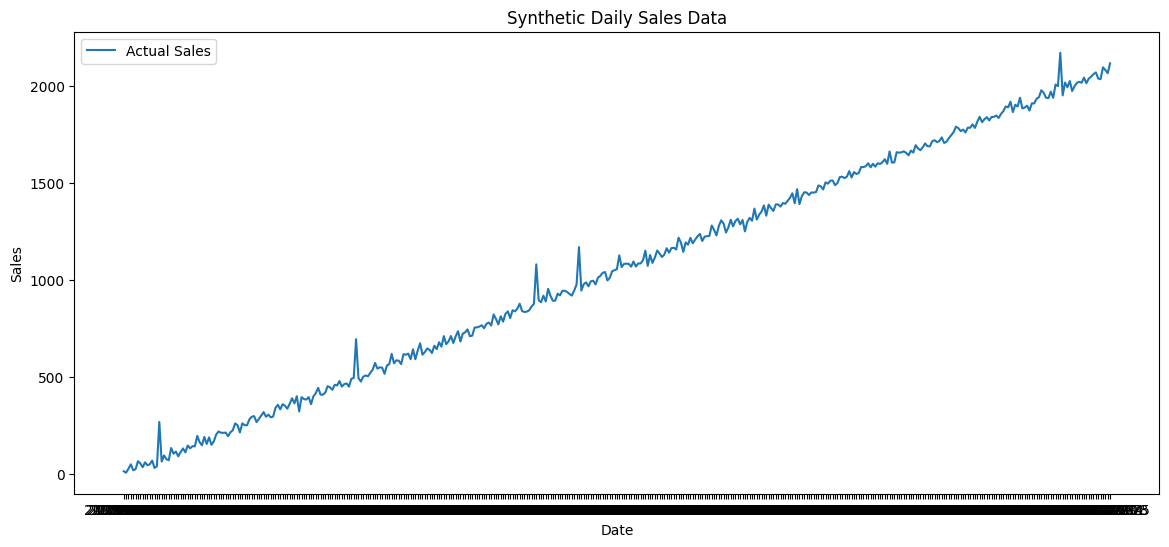

In [30]:
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Sales"], label="Actual Sales")
plt.title("Synthetic Daily Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [31]:
df.head()

,Date,Sales
0,2015-01-04,14.934283
1,2015-01-11,7.234714
2,2015-01-18,27.953771
3,2015-01-25,50.460597
4,2015-02-01,20.316933


In [32]:
df['Date'] = pd.to_datetime(df['Date']).dt.floor('D')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    417 non-null    datetime64[ns]
 1   Sales   417 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.6 KB


In [33]:
df["DayOfYear"] = df["Date"].dt.dayofyear
df["WeekOfYear"] = df["Date"].dt.year
df["DayOfWeek"] = df["Date"].dt.dayofweek
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

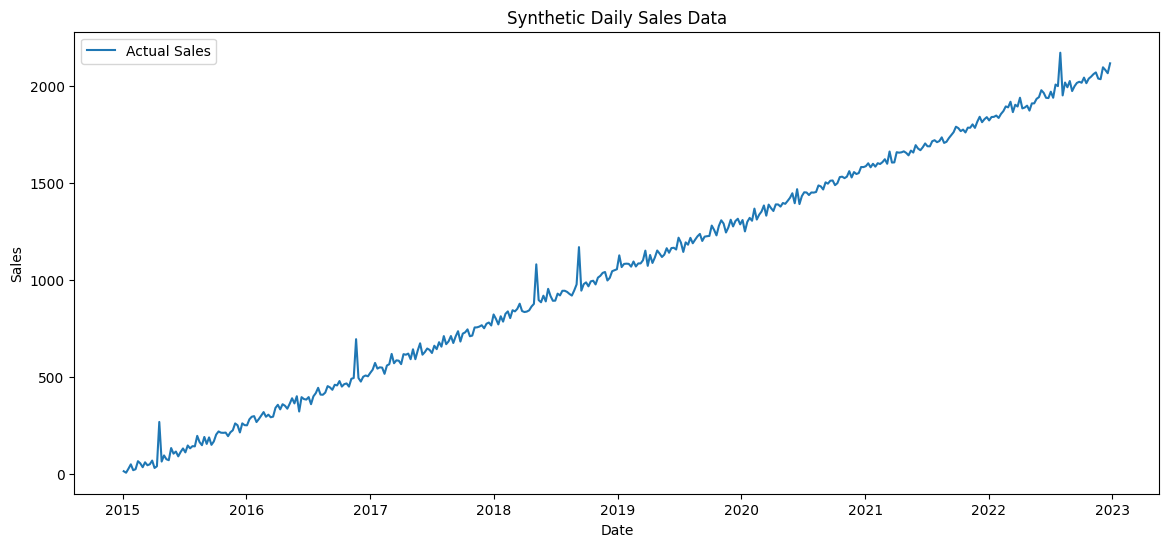

In [34]:
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Sales"], label="Actual Sales")
plt.title("Synthetic Daily Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

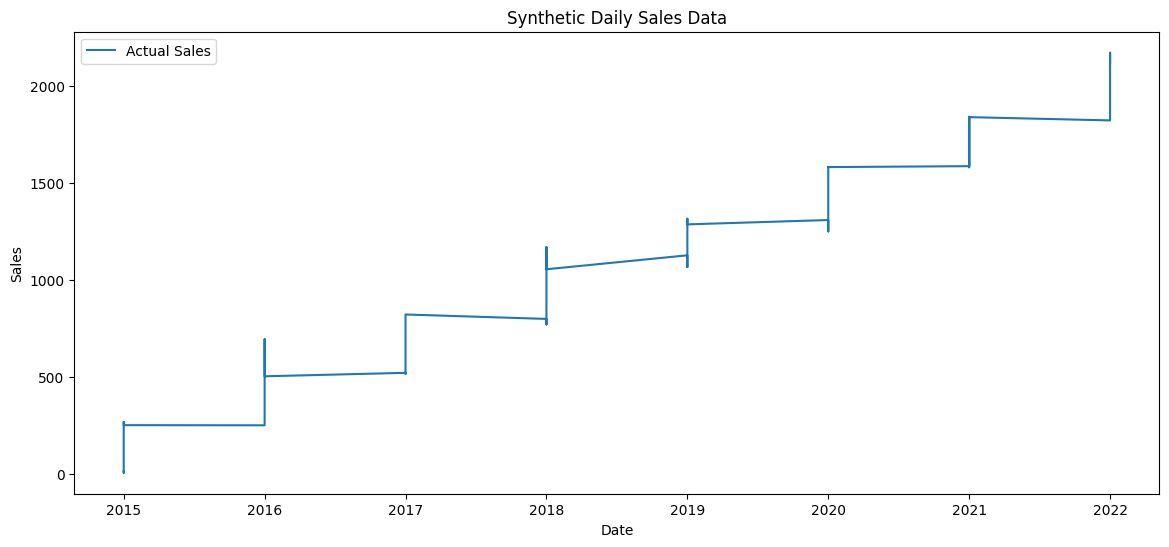

In [35]:
plt.figure(figsize=(14, 6))
plt.plot(df["Year"], df["Sales"], label="Actual Sales")
plt.title("Synthetic Daily Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [36]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [37]:
xtrain = train_data[["DayOfWeek", "Month", "Year", "DayOfYear", "WeekOfYear"]]
ytrain = train_data["Sales"]
xtest = test_data[["DayOfWeek", "Month", "Year", "DayOfYear", "WeekOfYear"]]
ytest = test_data["Sales"]

In [38]:
xtrain.head()

,DayOfWeek,Month,Year,DayOfYear,WeekOfYear
0,6,1,2015,4,2015
1,6,1,2015,11,2015
2,6,1,2015,18,2015
3,6,1,2015,25,2015
4,6,2,2015,32,2015


In [39]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [40]:
y_pred = model.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 761.4418912376184


In [41]:
model.score(xtest, ytest)*100

95.30799883910817

In [42]:
residuals = ytest - y_pred
residuals.head()

333   -17.616067
334    15.121568
335    -6.059056
336   -19.935847
337   -10.161615
Name: Sales, dtype: float64

Text(0, 0.5, 'Residuals')

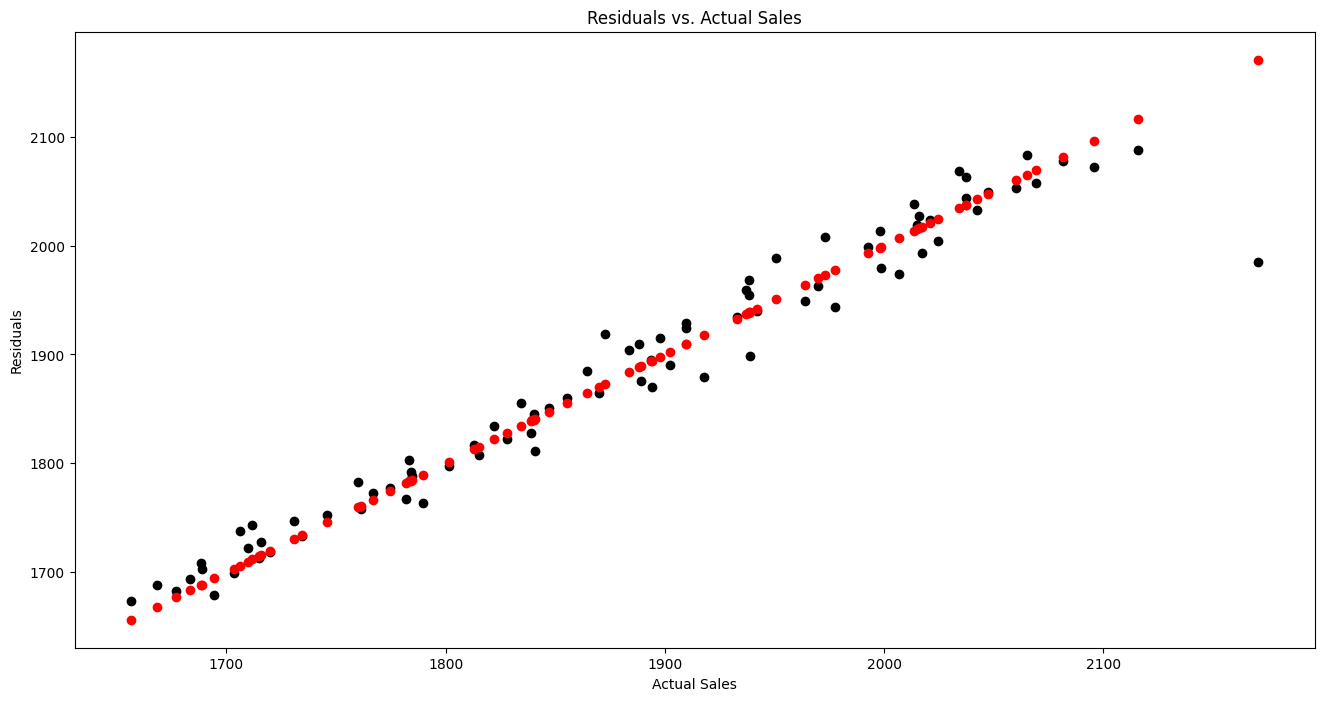

In [43]:
plt.figure(figsize=(16, 8)) 
plt.scatter(ytest, y_pred, color='black') 
plt.scatter(ytest, ytest, color='red') 
plt.title("Residuals vs. Actual Sales") 
plt.xlabel("Actual Sales") 
plt.ylabel("Residuals") 

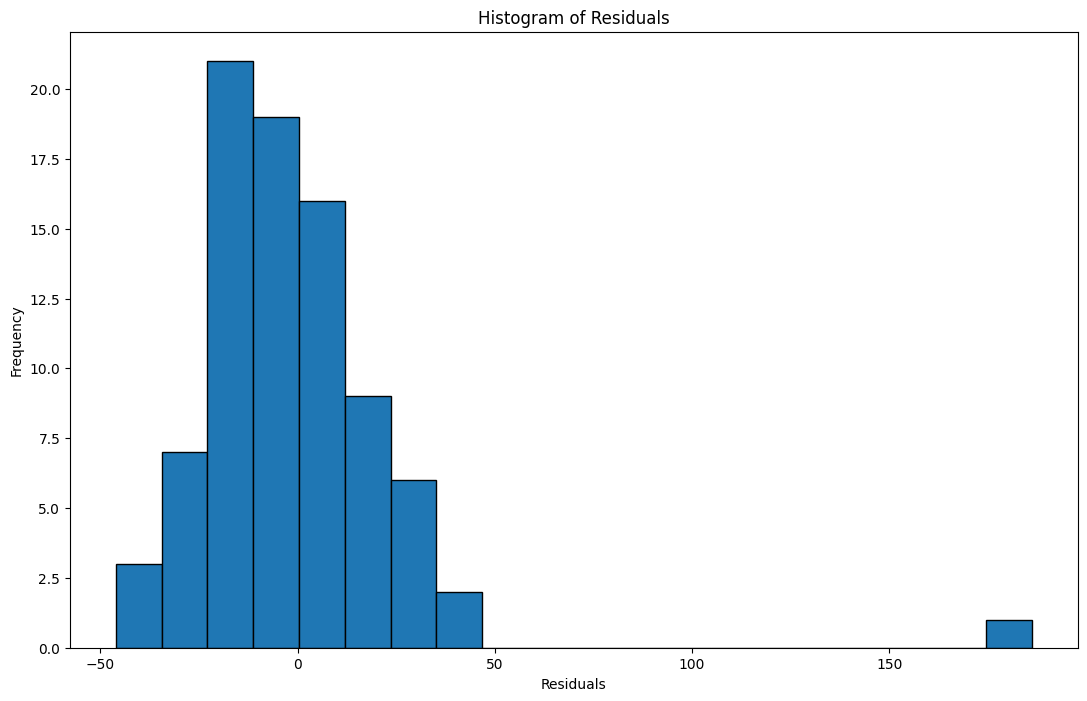

In [44]:
plt.figure(figsize=(13, 8)) 
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [47]:
forecast_dates = pd.date_range(start="2023-01-01", end="2025-12-31", freq="D")
forecast_data = pd.DataFrame({"Date": forecast_dates})

forecast_data["DayOfWeek"] = forecast_data["Date"].dt.dayofweek
forecast_data["Month"] = forecast_data["Date"].dt.month
forecast_data["Year"] = forecast_data["Date"].dt.year
forecast_data["DayOfYear"] = forecast_data["Date"].dt.dayofyear
forecast_data["WeekOfYear"] = forecast_data["Date"].dt.year

In [48]:
forecast_sales = model.predict(forecast_data[["DayOfWeek", "Month", "Year", "DayOfYear", "WeekOfYear"]])

In [49]:
forecast_sales

array([2095.09753213, 2095.85581711, 2096.61410208, ..., 2874.73415546,
       2875.49244044, 2876.25072542])

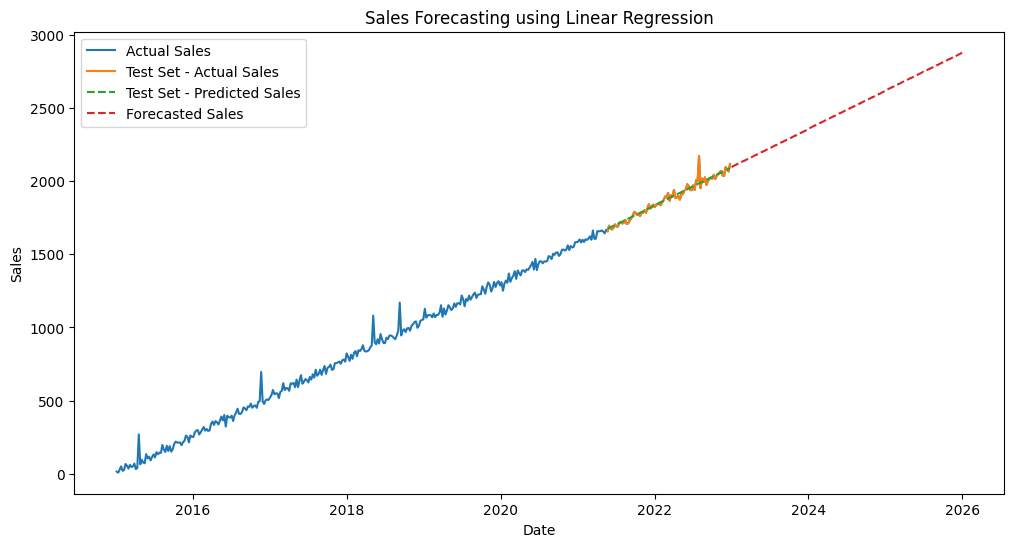

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Sales"], label="Actual Sales")
plt.plot(test_data["Date"], ytest, label="Test Set - Actual Sales")
plt.plot(test_data["Date"], y_pred, label="Test Set - Predicted Sales", linestyle="--")
plt.plot(forecast_data["Date"], forecast_sales, label="Forecasted Sales", linestyle="--")
plt.title("Sales Forecasting using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()